In [5]:
import pandas as pd
from roboflow import Roboflow
import supervision as sv
import cv2
import time
import os

In [7]:
os.getcwd()


'/workspaces/energy_industry_computer_vision/smokey_flare_detection'

In [8]:
rf = Roboflow(api_key="eytDtQ1Q75OZyEFEgHNF")
project = rf.workspace().project("fmmk2")
model = project.version(1).model
image_path = "./data/flare_2.jpg"
result = model.predict(image_path, confidence=40).json()

labels = [item["class"] for item in result["predictions"]]
print('Making detection on the image...')
time.sleep(3)
print(f'{labels[0]} has been detected in the image')

detections = sv.Detections.from_inference(result)

loading Roboflow workspace...
loading Roboflow project...
Making detection on the image...
fire has been detected in the image


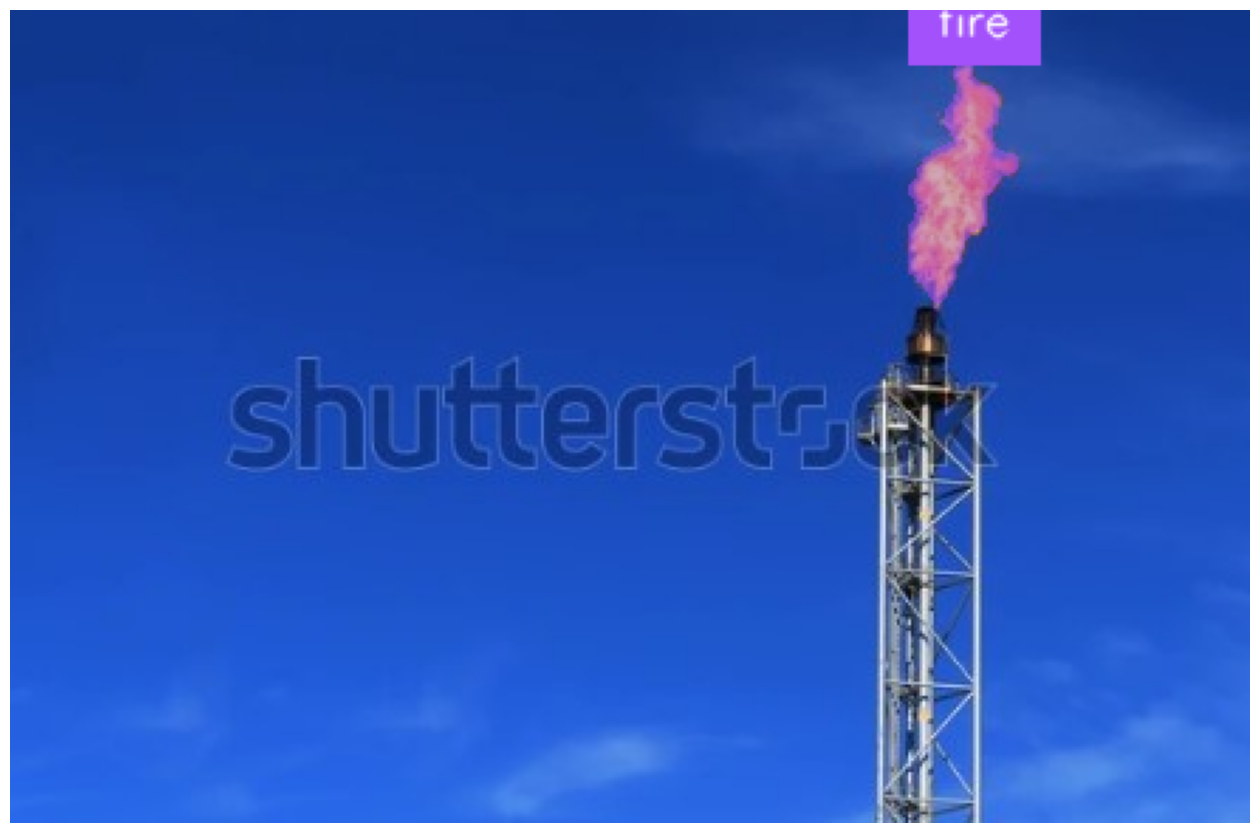

In [9]:
label_annotator = sv.LabelAnnotator()
mask_annotator = sv.MaskAnnotator()
image = cv2.imread(image_path)

annotated_image = mask_annotator.annotate(
      scene=image, detections=detections)
annotated_image = label_annotator.annotate(
      scene=annotated_image, detections=detections, labels=labels)

sv.plot_image(image=annotated_image, size=(16, 16))